In [229]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [230]:
path = '/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/Diatom_Data'
diatoms_all = pd.read_excel('/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/All Taxa.xls', index_col = None)
diatoms_unique = pd.DataFrame(diatoms_all.drop_duplicates())


def compile(path, diatoms_unique): 
    ID = 1
    percent = 1
    for file in os.listdir(path):
        if file.endswith('xls'):
            full_path = os.path.join(path, file)
            data = pd.read_excel(full_path)
            data = data.rename(columns={'Taxon Name ':'Taxa', 'SampleID':ID, '%':percent}).drop(columns=['Count ', 'Valves/mg', 'Count ID'])
            diatoms_unique = pd.merge(diatoms_unique, data, on = 'Taxa', how = 'outer')
            # print(diatoms_unique)
            ID = ID +1
            percent = percent + 1
    return diatoms_unique

df = compile(path, diatoms_unique)
df = df.T
df.columns = df.iloc[0]   
df = df.fillna(0)
df = df.drop('Taxa')  
# df

In [231]:
df = df.reset_index(drop=True)
df = df.iloc[::2]


In [232]:
index = [
 'COH029',
 'COH002',
 'COH028',
 'COH012',
 'COH026',
 'COH009',
 'COH010',
 'COH013',
 'COH014',
 'COH004',
 'COH016',
 'COH007',
 'COH021',
 'COH017',
 'COH018',
 'COH030',
 'COH006',
 'COH022',
 'COH011',
 'COH024']

df.index = index

In [233]:
nutrient_data = pd.read_excel('/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/Antarctic_Season1_CNP_Enzymes_Metadata_no_formulas.xlsx')
nutrient_data.columns
# nutrient_data.head()
nutrient_data = nutrient_data.drop(columns=['Wet_dry_conversion', 'Qubit_raw_ng/uL','g_wet_extracted_DNA', 'Qubit_ng_DNA/g_cryo',
       'Chl-a_raw_ug/L', 'g_wet_extracted_chla', 'ug_chl-a/g_cryo',
       'g_weighboat', 'g_wet', 'g_dry_plusboat', 'g_ashed_plusboat', 'Tardigrades_extracted', 'Rotifers_extracted',
       'Ciliates_extracted', 'ml_in_extraction', 'ml_counted', 
      'TC_percent', 'TN_percent', 'BG/(NAG+LAP)', '(NAG+LAP)/Phos',
       'BG/Phos', 'AG', 'BG', 'BXYL', 'CBH', 'LAP', 'NAG', 'PHOS',
       'percent_OM_nonacifidified', 'percent_OM_acid',
       'percent_OM_leached_with_water_instead_of_acid'])
# nutrient_data


In [234]:
coo = nutrient_data.iloc[30:60]
# print(coo['SampleID'])


per_org_mean = coo['percent_organic'].mean()
f_mean = coo['Fluorescence'].mean()
microfauna_mean = coo['g_wet_microfauna'].mean()
tard_mean = coo['Tardigrades/g_dry'].mean()
rot_mean = coo['Rotifers/g_dry'].mean()
cil_mean = coo['Ciliates/g_dry'].mean()
ph_mean = coo['pH_lab'].mean()
elec_mean = coo['electrical_conductivity'].mean()

coo['percent_organic'].fillna(per_org_mean, inplace=True)
coo['Fluorescence'].fillna(f_mean, inplace=True)
coo['g_wet_microfauna'].fillna(microfauna_mean, inplace=True)
coo['Tardigrades/g_dry'].fillna(tard_mean, inplace=True)
coo['Rotifers/g_dry'].fillna(rot_mean, inplace=True)
coo['Ciliates/g_dry'].fillna(cil_mean, inplace=True)
coo['pH_lab'].fillna(ph_mean, inplace=True)
coo['electrical_conductivity'].fillna(elec_mean, inplace=True)

/tmp/ipykernel_93654/3564054524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coo['percent_organic'].fillna(per_org_mean, inplace=True)
/tmp/ipykernel_93654/3564054524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coo['Fluorescence'].fillna(f_mean, inplace=True)
/tmp/ipykernel_93654/3564054524.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coo['g_wet_microfauna'].fillna(microfauna_mean, inplace=True)
/tmp/ipykernel_

In [235]:
coo = pd.DataFrame(coo)
coo = coo.set_index('SampleID')
# coo

In [236]:
rf_dataset = pd.merge(df, coo, left_index=True, right_index=True)

In [237]:
rf_dataset

,Luticola mutica,Luticola gaussii,Humidophila arcuata var. parallela,Luticola laeta,Luticola mcknightiae,Muelleria supra,Luticola permuticopsis,Humidophila arcuata,Muelleria peraustralis,Craticula molestiformis,...,Rotifers/g_dry,Ciliates/g_dry,Diameter_1_cm,Diameter_2_cm,Depth_cm,pH_lab,electrical_conductivity,TC_ppm,TN_ppm,TP_ppm
COH029,4.29,8.93,72.86,0,1.07,0.36,0,6.07,4.64,0,...,0.03,0.00,30.0,24,17,7.280000,81.5,12750.0,1768.0,741.0
COH002,1.66,11.59,63.25,6.62,2.65,4.97,0.99,3.97,2.98,0.33,...,0.20,0.07,28.0,28,17,7.225714,104.1,13760.0,2093.0,255.0
COH028,1.67,11.67,66.67,5.0,1.0,3.0,0,4.67,5.67,0,...,0.97,0.10,25.0,25,20,7.225714,104.1,3613.0,603.0,629.0
COH012,3.58,12.05,56.68,1.3,0.98,1.3,0,18.24,3.58,0,...,0.66,1.99,19.0,19,20,7.330000,204.4,9354.0,1295.0,565.0
COH026,1.0,14.62,61.79,7.31,1.33,4.32,0,4.32,2.66,0,...,0.14,0.00,19.0,24,24,6.960000,89.2,2968.0,360.0,809.0
COH009,3.92,6.54,34.31,1.63,3.92,7.84,0,36.28,5.56,0,...,0.50,0.01,27.0,30,17,7.225714,104.1,3020.0,506.0,129.0
COH010,3.32,15.95,45.52,10.63,4.65,4.32,2.33,8.64,4.32,0.33,...,0.43,0.06,30.0,30,14,7.225714,104.1,2313.0,486.0,181.0
COH013,3.3,11.88,55.45,6.93,1.98,4.29,4.29,4.29,4.95,0,...,1.19,0.00,23.0,18,17,7.225714,104.1,5977.0,1050.0,710.0
COH014,6.89,8.53,51.15,9.84,0.98,4.92,2.3,6.89,5.25,0,...,0.53,0.00,18.0,18,15,7.225714,104.1,5278.0,901.0,900.0
COH004,1.66,15.89,48.34,3.64,1.66,3.31,0,19.54,5.3,0,...,0.31,0.05,24.0,21,15,7.225714,104.1,7428.0,1258.0,200.0


In [238]:
rf_dataset.columns #Fluoresence is a measure of chloroplast. 

Index(['Luticola mutica ', 'Luticola gaussii ',
       'Humidophila arcuata var. parallela ', 'Luticola laeta ',
       'Luticola mcknightiae ', 'Muelleria supra ', 'Luticola permuticopsis ',
       'Humidophila arcuata ', 'Muelleria peraustralis ',
       'Craticula molestiformis ', 'Mayamaea atomus var. #1 ',
       'Chamaepinnularia deltaica ', 'Fistulifera pelliculosa ',
       'Humidophila australis ', 'Luticola murrayi ',
       'Luticola austroatlantica ', 'Luticola dolia ',
       'Craspedostauros laevissiumus ', 'Luticola sp. #2 ',
       'Luticola spainiae ', 'Luticola muticopsis ', 'Muelleria cryoconicola ',
       'Hantzschia amphioxys ', 'Fluorescence', 'percent_organic',
       'g_wet_microfauna', 'Tardigrades/g_dry', 'Rotifers/g_dry',
       'Ciliates/g_dry', 'Diameter_1_cm', 'Diameter_2_cm', 'Depth_cm',
       'pH_lab', 'electrical_conductivity', 'TC_ppm', 'TN_ppm', 'TP_ppm'],
      dtype='object')

### Decision Tree

In [402]:
features = rf_dataset.drop(['Luticola mcknightiae ',  'Fluorescence'], axis=1)
features
target = rf_dataset['Luticola mcknightiae ']
target

COH029    1.07
COH002    2.65
COH028     1.0
COH012    0.98
COH026    1.33
COH009    3.92
COH010    4.65
COH013    1.98
COH014    0.98
COH004    1.66
COH016     3.0
COH007    1.67
COH021     4.0
COH017    2.97
COH018    4.33
COH030    1.31
COH006    0.33
COH022    2.32
COH011    2.31
COH024    2.32
Name: Luticola mcknightiae , dtype: object

In [403]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [404]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [405]:
y_pred = regressor.predict(X_test)

In [406]:
y_pred #This is the % abundance prediction of 'Luticola mcknightiae '

array([0.33  , 4.    , 4.33  , 1.9075])

In [407]:
# Calculate MSE, MAE, and R^2 score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print("Feature Importance:", regressor.feature_importances_)

Mean Squared Error: 3.2604265625
Mean Absolute Error: 1.5456249999999998
R^2 Score: -6.4089027282668924
Feature Importance: [6.03830250e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.46058820e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.81744698e-01 0.00000000e+00
 1.20163563e-04 1.10117389e-01 0.00000000e+00 1.19187234e-02
 1.68980011e-05 2.76028848e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.62037398e-01]


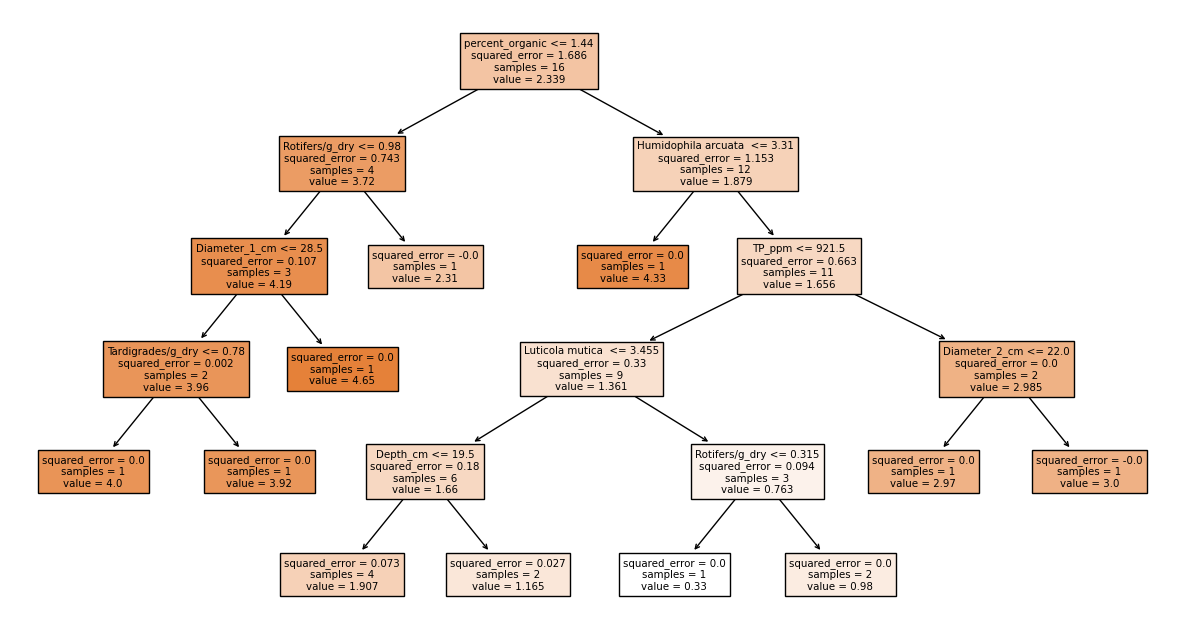

In [408]:
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=features.columns, filled=True)
plt.show()

### Random Forests

In [409]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [410]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R^2 Score: -1.8744875473434406
Mean Squared Error: 1.2649721418499935


### Linear Regression

In [411]:
features = rf_dataset['TP_ppm'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


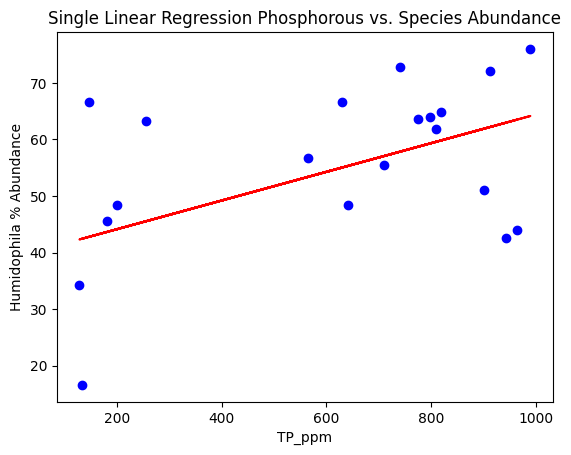

In [412]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(features, target, color='blue', label='Actual data')
plt.plot(features, model.predict(features), color='red', label='Regression line')
plt.xlabel('TP_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Single Linear Regression Phosphorous vs. Species Abundance')
plt.show()

In [250]:
r_squared = r2_score(target, model.predict(features))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('r_squared value is', r_squared)
print('Root Mean Squared Error is', rmse)
y_test


r_squared value is 0.1892070405172095
Root Mean Squared Error is 15.942102452666623


COH029    72.86
COH022    44.04
COH030    72.13
COH002    63.25
Name: Humidophila arcuata var. parallela , dtype: object

In [251]:
features = rf_dataset['TC_ppm'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

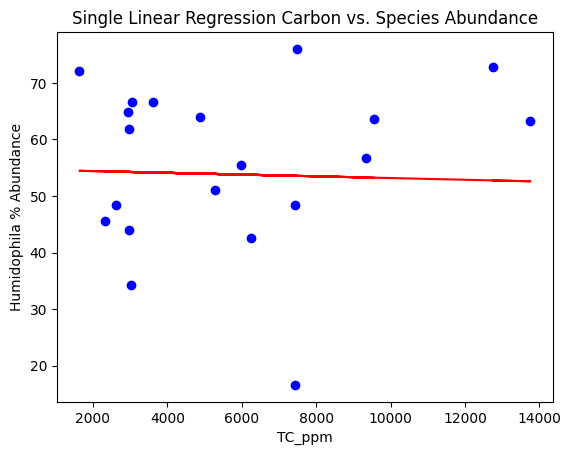

In [252]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(features, target, color='blue', label='Actual data')
plt.plot(features, model.predict(features), color='red', label='Regression line')
plt.xlabel('TC_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Single Linear Regression Carbon vs. Species Abundance')
plt.show()

In [253]:
r_squared = r2_score(target, model.predict(features))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('r_squared value is', r_squared)
print('Root Mean Squared Error is', rmse)

r_squared value is -0.030363764206959187
Root Mean Squared Error is 15.281762468245665


In [413]:
features = rf_dataset['TN_ppm'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Single Linear Regression Nitrgoen vs. Species Abundance')

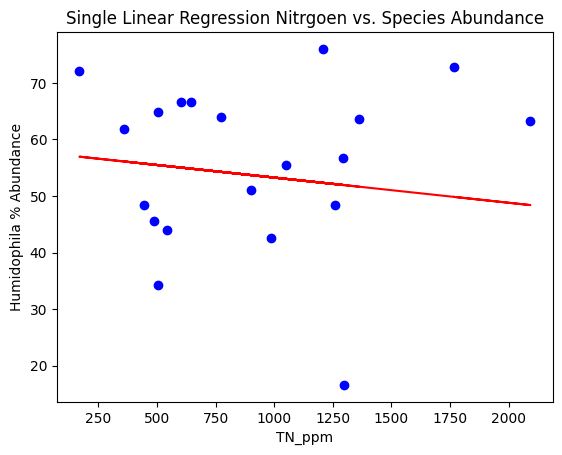

In [414]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(features, target, color='blue', label='Actual data')
plt.plot(features, model.predict(features), color='red', label='Regression line')
plt.xlabel('TN_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Single Linear Regression Nitrgoen vs. Species Abundance')

In [415]:
r_squared = r2_score(target, model.predict(features))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('r_squared value is', r_squared)
print('Root Mean Squared Error is', rmse)

r_squared value is -0.06440326894166759
Root Mean Squared Error is 16.639633649482935


In [257]:
features = rf_dataset['electrical_conductivity'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Single Linear Regression Conductivity vs. Species Abundance')

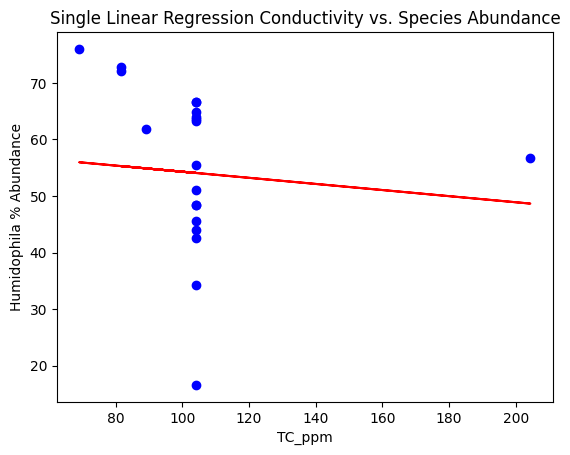

In [258]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(features, target, color='blue', label='Actual data')
plt.plot(features, model.predict(features), color='red', label='Regression line')
plt.xlabel('TC_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Single Linear Regression Conductivity vs. Species Abundance')

In [259]:
rf_dataset.columns



Index(['Luticola mutica ', 'Luticola gaussii ',
       'Humidophila arcuata var. parallela ', 'Luticola laeta ',
       'Luticola mcknightiae ', 'Muelleria supra ', 'Luticola permuticopsis ',
       'Humidophila arcuata ', 'Muelleria peraustralis ',
       'Craticula molestiformis ', 'Mayamaea atomus var. #1 ',
       'Chamaepinnularia deltaica ', 'Fistulifera pelliculosa ',
       'Humidophila australis ', 'Luticola murrayi ',
       'Luticola austroatlantica ', 'Luticola dolia ',
       'Craspedostauros laevissiumus ', 'Luticola sp. #2 ',
       'Luticola spainiae ', 'Luticola muticopsis ', 'Muelleria cryoconicola ',
       'Hantzschia amphioxys ', 'Fluorescence', 'percent_organic',
       'g_wet_microfauna', 'Tardigrades/g_dry', 'Rotifers/g_dry',
       'Ciliates/g_dry', 'Diameter_1_cm', 'Diameter_2_cm', 'Depth_cm',
       'pH_lab', 'electrical_conductivity', 'TC_ppm', 'TN_ppm', 'TP_ppm'],
      dtype='object')

In [416]:
features = rf_dataset['Tardigrades/g_dry'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Single Linear Regression Tartigrades vs. Species Abundance')

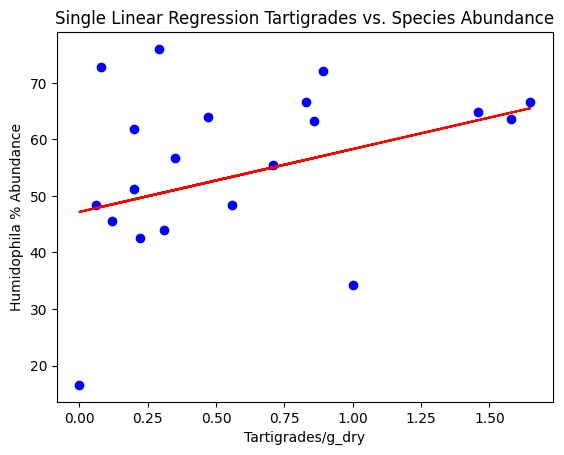

In [418]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(features, target, color='blue', label='Actual data')
plt.plot(features, model.predict(features), color='red', label='Regression line')
plt.xlabel('Tartigrades/g_dry')
plt.ylabel('Humidophila % Abundance')
plt.title('Single Linear Regression Tartigrades vs. Species Abundance')

In [262]:
r_squared = r2_score(target, model.predict(features))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('r_squared value is', r_squared)
print('Root Mean Squared Error is', rmse)

r_squared value is 0.1091156702042263
Root Mean Squared Error is 15.232994221048568


### Polynomial Linear Regression

In [423]:
features = rf_dataset['TP_ppm'].values.reshape(-1,1)
target = rf_dataset['Humidophila arcuata var. parallela ']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [424]:
polyfeatures = PolynomialFeatures(degree = 4, include_bias=False)
xpoly_train = polyfeatures.fit_transform(X_train)
xpoly_test = polyfeatures.transform(X_test)
model = LinearRegression()
model.fit(xpoly_train, y_train)
y_pred = model.predict(xpoly_test)

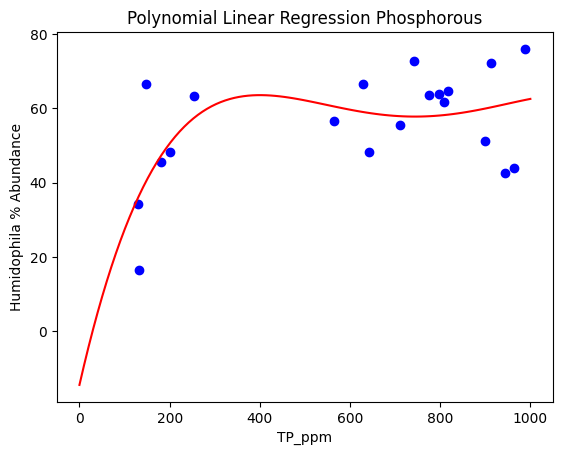

Intercept: -14.410912346553857
Coefficients: [ 5.32416665e-01 -1.26568266e-03  1.21818248e-06 -4.07953372e-10]


In [425]:
plt.scatter(features, target, color='blue', label='Actual data')
X_plot = np.linspace(0, 1000, 100).reshape(-1, 1)
X_plot_poly = polyfeatures.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='red', label='Polynomial regression')
plt.xlabel('TP_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Polynomial Linear Regression Phosphorous')
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

In [296]:
X_poly = polyfeatures.fit_transform(features)
r2 = r2_score(target, model.predict(X_poly))
print(f"R-squared: {r2}")
rmse = np.sqrt(mean_squared_error(target, model.predict(X_poly)))
print(f"RMSE: {rmse}")

R-squared: 0.32259833257243364
RMSE: 11.71590408801216


In [430]:
features = rf_dataset['TC_ppm'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

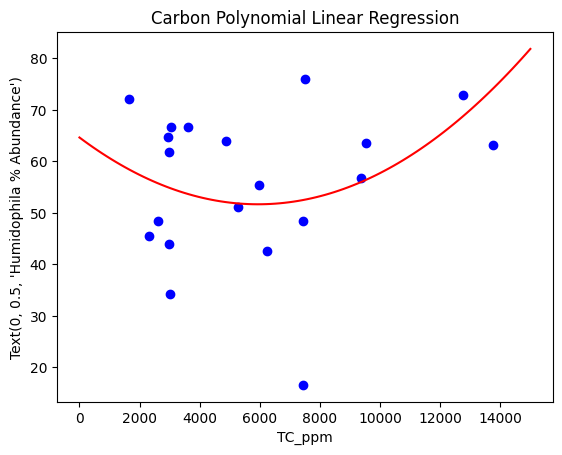

Intercept: 64.62852044502533
Coefficients: [-4.36405269e-03  3.67319375e-07]


In [431]:
polyfeatures = PolynomialFeatures(degree = 2, include_bias=False)
xpoly_train = polyfeatures.fit_transform(X_train)
xpoly_test = polyfeatures.transform(X_test)
model = LinearRegression()
model.fit(xpoly_train, y_train)
y_pred = model.predict(xpoly_test)
plt.scatter(features, target, color='blue', label='Actual data')
X_plot = np.linspace(0, 15000, 100).reshape(-1, 1)
X_plot_poly = polyfeatures.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='red', label='Polynomial regression')
plt.xlabel('TC_ppm')
plt.ylabel(plt.ylabel('Humidophila % Abundance'))
plt.title('Carbon Polynomial Linear Regression')
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

In [314]:
X_poly = polyfeatures.fit_transform(features)
r2 = r2_score(target, model.predict(X_poly))
print(f"R-squared: {r2}")
rmse = np.sqrt(mean_squared_error(target, model.predict(X_poly)))
print(f"RMSE: {rmse}")

R-squared: 0.10278506738811588
RMSE: 13.483446725654405


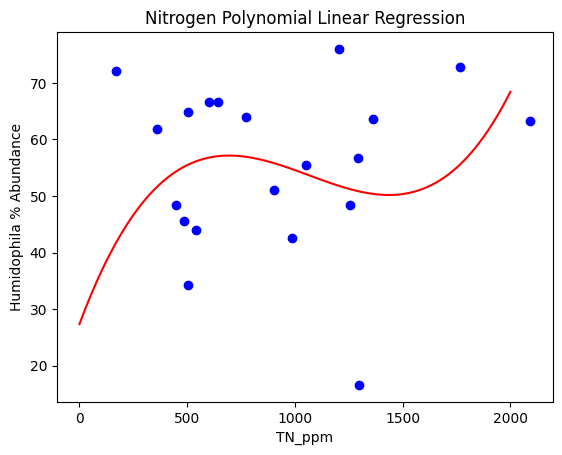

Intercept: 27.36335614603101
Coefficients: [ 1.02256884e-01 -1.09217296e-04  3.41740983e-08]


In [433]:
features = rf_dataset['TN_ppm'].values.reshape(-1,1)
features
target = rf_dataset['Humidophila arcuata var. parallela ']
target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

polyfeatures = PolynomialFeatures(degree = 3, include_bias=False)
xpoly_train = polyfeatures.fit_transform(X_train)
xpoly_test = polyfeatures.transform(X_test)
model = LinearRegression()
model.fit(xpoly_train, y_train)
y_pred = model.predict(xpoly_test)
plt.scatter(features, target, color='blue', label='Actual data')
X_plot = np.linspace(0, 2000, 100).reshape(-1, 1)
X_plot_poly = polyfeatures.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='red', label='Polynomial regression')
plt.xlabel('TN_ppm')
plt.ylabel('Humidophila % Abundance')
plt.title('Nitrogen Polynomial Linear Regression')
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

In [434]:
X_poly = polyfeatures.fit_transform(features)
r2 = r2_score(target, model.predict(X_poly))
print(f"R-squared: {r2}")
rmse = np.sqrt(mean_squared_error(target, model.predict(X_poly)))
print(f"RMSE: {rmse}")

R-squared: -0.15866100596109223
RMSE: 15.322543842075035
